In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from PIL import Image
%matplotlib inline

In [4]:
df_train = pd.read_json('Data/train.json')

In [5]:
img = np.array(df_train.iloc[0]['band_1']).reshape((75,75))

In [6]:
df_train.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg'], dtype='object')

In [7]:
df_train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [8]:
def color_composite(data):
    rgb_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 / band_2

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

In [9]:
rgb_train = color_composite(df_train)

In [10]:
rgb_train.shape

(1604, 75, 75, 3)

In [11]:
rgb_train[0:1000,:,:,:].shape

(1000, 75, 75, 3)

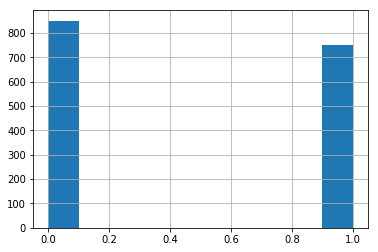

In [13]:
(df_train['is_iceberg']).hist()

We have a balanced dataset, almost equal quantities of samples of each category.

In [11]:
#Rotate images to create more data samples
a = rotate(rgb_train, angle =90,axes = (1,2))
b = rotate(rgb_train, angle =180,axes = (1,2))
c = rotate(rgb_train, angle =270,axes = (1,2))

In [12]:
X = np.concatenate([rgb_train,a,b,c],axis = 0)
X.shape

(6416, 75, 75, 3)

Concatenate rotated data to generate more images. This is called Data Augmentation.

In [14]:
Y_s = df_train['is_iceberg'].values
Y = np.concatenate([Y_s,Y_s,Y_s,Y_s])
Y.transpose().shape

(6416,)

In [15]:
Y =np.matrix(Y)
Y=Y.transpose()

In [16]:
Y.shape

(6416, 1)

In [17]:
from sklearn.utils import shuffle

In [18]:
X, Y = shuffle(X, Y, random_state=0)

In [19]:
X.shape

(6416, 75, 75, 3)

In [20]:
Y.shape

(6416, 1)

Checking data in bands. We need to ensure data is correct. 

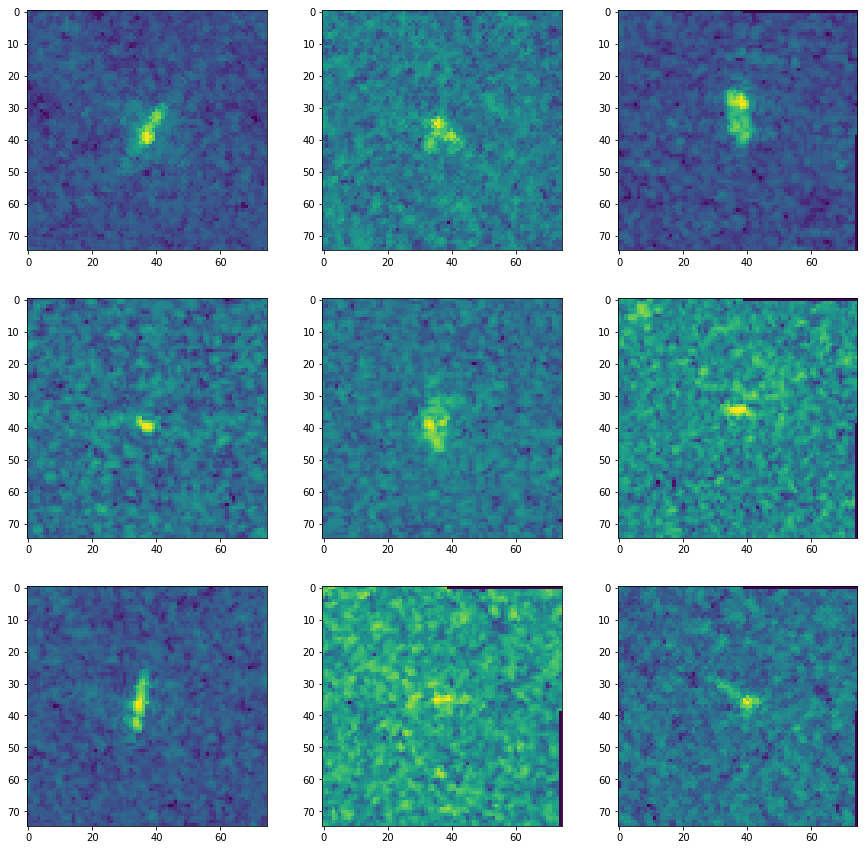

In [21]:
#checking Band1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = X[i+2000, :, :,0]
    ax.imshow(arr)
    
plt.show()

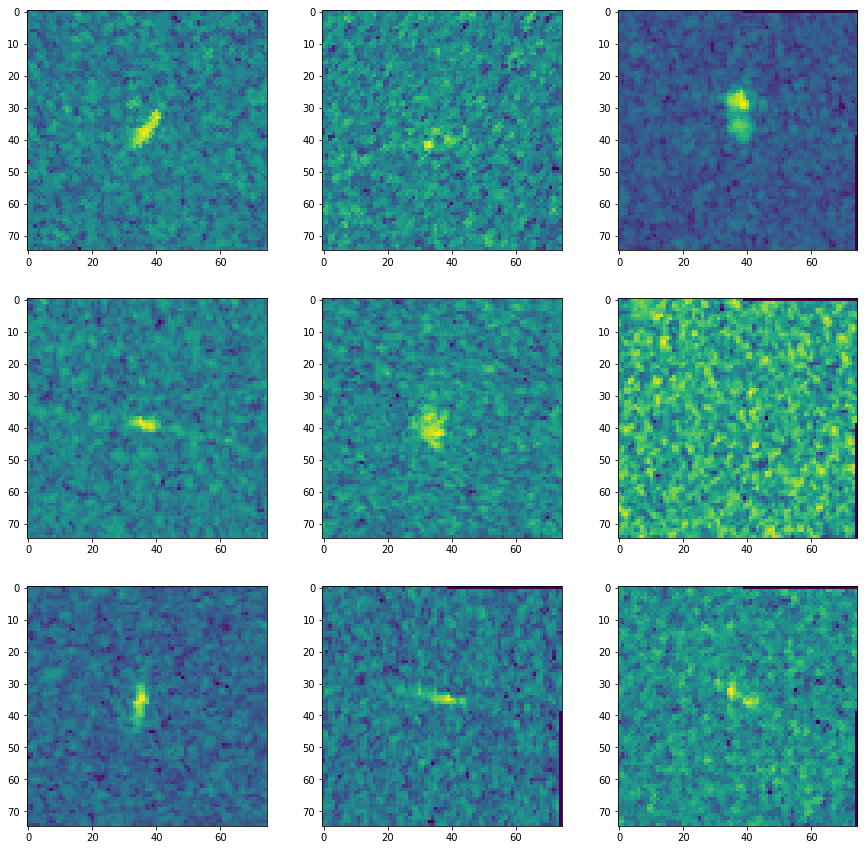

In [22]:
#checking Band2
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = X[i+2000, :, :,1]
    ax.imshow(arr)
    
plt.show()

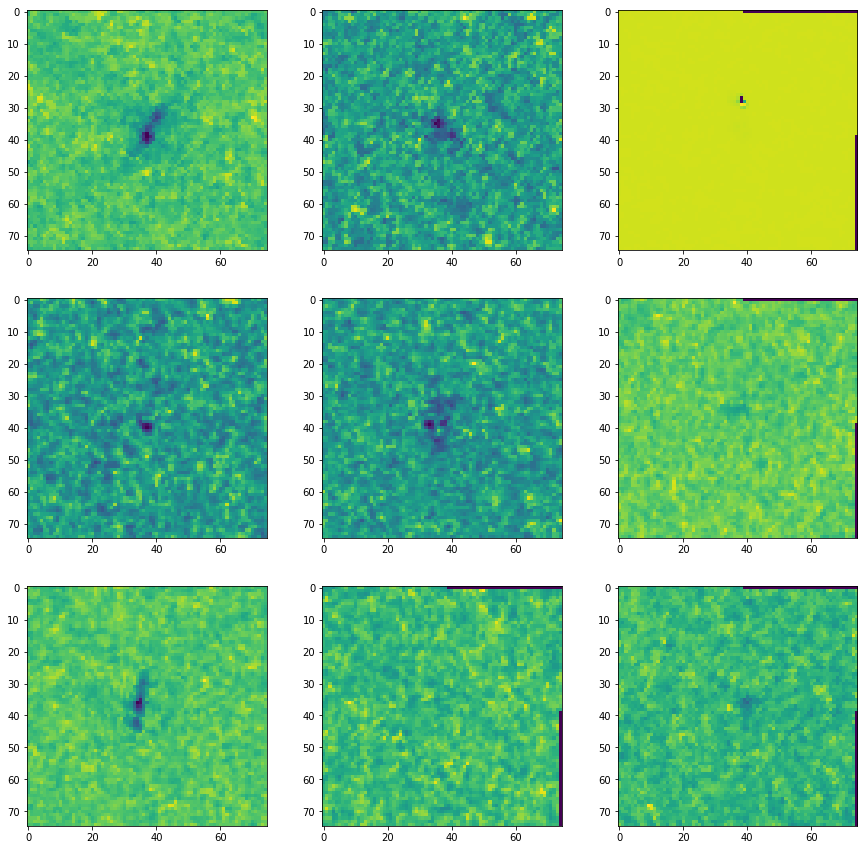

In [23]:
#checking Band3
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = X[i+2000, :, :,2]
    ax.imshow(arr)
    
plt.show()

In [28]:
#not required in our code
#ordering the input data for thano if required i.e channel first
Z1 = np.swapaxes(X,3,1)
Z1.shape
#Tf take channel as last dimension

(6416, 3, 75, 75)